In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect
import seaborn as sns

In [2]:
edx_courses = pd.read_csv("./Datasets/Moocs/edx_courses.csv")
print(edx_courses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

### checking for nulls and duplicates

In [3]:
# Nulls
print(edx_courses.isnull().sum())

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64


In [4]:
# Duplicates
print(edx_courses.duplicated().sum())

1


In [5]:
print(edx_courses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [6]:
edx_courses = edx_courses.dropna(subset=["summary", "n_enrolled", "course_description"])
edx_courses = edx_courses.drop(columns=["instructors", "subtitles", "course_syllabus"])


In [7]:
print(edx_courses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 973
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               795 non-null    object
 1   summary             795 non-null    object
 2   n_enrolled          795 non-null    object
 3   course_type         795 non-null    object
 4   institution         795 non-null    object
 5   Level               795 non-null    object
 6   subject             795 non-null    object
 7   language            795 non-null    object
 8   course_effort       795 non-null    object
 9   course_length       795 non-null    object
 10  price               795 non-null    object
 11  course_description  795 non-null    object
 12  course_url          795 non-null    object
dtypes: object(13)
memory usage: 87.0+ KB
None


In [8]:
print(edx_courses)

                                                 title  \
0                                  How to Learn Online   
1    Programming for Everybody (Getting Started wit...   
2              CS50's Introduction to Computer Science   
3                                   The Analytics Edge   
4    Marketing Analytics: Marketing Measurement Str...   
..                                                 ...   
964         StudioX: Creating a Course with edX Studio   
966           Introducción a las ondas gravitacionales   
969         Global China: From the Mongols to the Ming   
972  Computational Neuroscience: Neuronal Dynamics ...   
973  Cities and the Challenge of Sustainable Develo...   

                                               summary n_enrolled  \
0    Learn essential strategies for successful onli...    124,980   
1    This course is a "no prerequisite" introductio...    293,864   
2    An introduction to the intellectual enterprise...  2,442,271   
3    Through inspiring exam

In [9]:
edx_courses["n_enrolled"] = edx_courses["n_enrolled"].str.replace(",", "").astype(int)
min_enrolled = edx_courses["n_enrolled"].min()
max_enrolled = edx_courses["n_enrolled"].max()

edx_courses['popular'] = np.where((edx_courses['n_enrolled'] >= min_enrolled) & (edx_courses['n_enrolled'] <= (min_enrolled + (max_enrolled - min_enrolled)/5)), 1, 
                                   np.where((edx_courses['n_enrolled'] > (min_enrolled + (max_enrolled - min_enrolled)/5)) & (edx_courses['n_enrolled'] <= (min_enrolled + 2*(max_enrolled - min_enrolled)/5)), 2, 
                                            np.where((edx_courses['n_enrolled'] > (min_enrolled + 2*(max_enrolled - min_enrolled)/5)) & (edx_courses['n_enrolled'] <= (min_enrolled + 3*(max_enrolled - min_enrolled)/5)), 3, 
                                                     np.where((edx_courses['n_enrolled'] > (min_enrolled + 3*(max_enrolled - min_enrolled)/5)) & (edx_courses['n_enrolled'] <= (min_enrolled + 4*(max_enrolled - min_enrolled)/5)), 4, 5))))


In [10]:
print(edx_courses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 973
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               795 non-null    object
 1   summary             795 non-null    object
 2   n_enrolled          795 non-null    int32 
 3   course_type         795 non-null    object
 4   institution         795 non-null    object
 5   Level               795 non-null    object
 6   subject             795 non-null    object
 7   language            795 non-null    object
 8   course_effort       795 non-null    object
 9   course_length       795 non-null    object
 10  price               795 non-null    object
 11  course_description  795 non-null    object
 12  course_url          795 non-null    object
 13  popular             795 non-null    int32 
dtypes: int32(2), object(12)
memory usage: 87.0+ KB
None


In [11]:
print(edx_courses)

                                                 title  \
0                                  How to Learn Online   
1    Programming for Everybody (Getting Started wit...   
2              CS50's Introduction to Computer Science   
3                                   The Analytics Edge   
4    Marketing Analytics: Marketing Measurement Str...   
..                                                 ...   
964         StudioX: Creating a Course with edX Studio   
966           Introducción a las ondas gravitacionales   
969         Global China: From the Mongols to the Ming   
972  Computational Neuroscience: Neuronal Dynamics ...   
973  Cities and the Challenge of Sustainable Develo...   

                                               summary  n_enrolled  \
0    Learn essential strategies for successful onli...      124980   
1    This course is a "no prerequisite" introductio...      293864   
2    An introduction to the intellectual enterprise...     2442271   
3    Through inspiring 

C:\Users\miauchis\AppData\Local\Temp\ipykernel_12652\3702458309.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


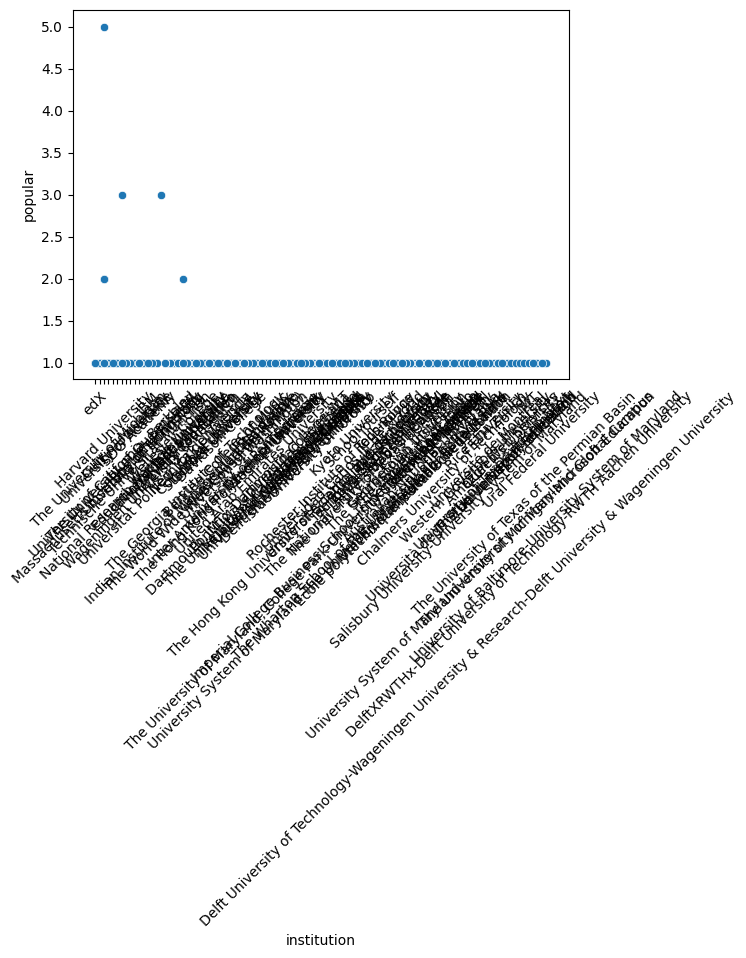

In [12]:
sns.scatterplot(x="institution", y="popular", data=edx_courses)
plt.xticks(fontsize=10) # modify the font size of the x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

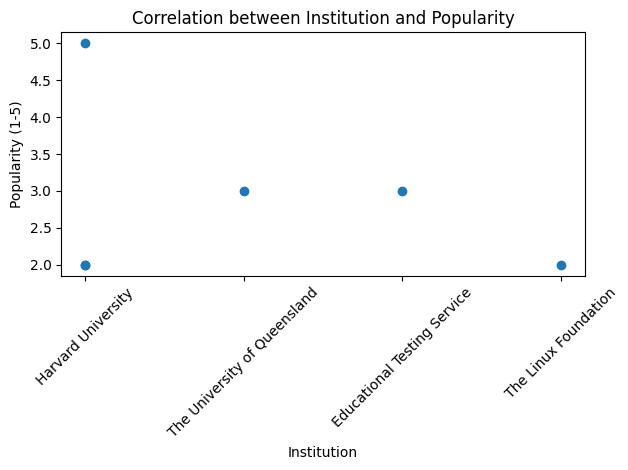

In [13]:
edx_courses_filtered = edx_courses[edx_courses['popular'] >= 2]

plt.scatter(edx_courses_filtered['institution'], edx_courses_filtered['popular'])
plt.xlabel('Institution')
plt.ylabel('Popularity (1-5)')
plt.title('Correlation between Institution and Popularity')
plt.xticks(fontsize=10) # modify the font size of the x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# check before more transformations

In [14]:
print(edx_courses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 973
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               795 non-null    object
 1   summary             795 non-null    object
 2   n_enrolled          795 non-null    int32 
 3   course_type         795 non-null    object
 4   institution         795 non-null    object
 5   Level               795 non-null    object
 6   subject             795 non-null    object
 7   language            795 non-null    object
 8   course_effort       795 non-null    object
 9   course_length       795 non-null    object
 10  price               795 non-null    object
 11  course_description  795 non-null    object
 12  course_url          795 non-null    object
 13  popular             795 non-null    int32 
dtypes: int32(2), object(12)
memory usage: 87.0+ KB
None


In [15]:
print(edx_courses)

                                                 title  \
0                                  How to Learn Online   
1    Programming for Everybody (Getting Started wit...   
2              CS50's Introduction to Computer Science   
3                                   The Analytics Edge   
4    Marketing Analytics: Marketing Measurement Str...   
..                                                 ...   
964         StudioX: Creating a Course with edX Studio   
966           Introducción a las ondas gravitacionales   
969         Global China: From the Mongols to the Ming   
972  Computational Neuroscience: Neuronal Dynamics ...   
973  Cities and the Challenge of Sustainable Develo...   

                                               summary  n_enrolled  \
0    Learn essential strategies for successful onli...      124980   
1    This course is a "no prerequisite" introductio...      293864   
2    An introduction to the intellectual enterprise...     2442271   
3    Through inspiring 

# Drop unecesary columns

In [16]:
edx_courses.drop(columns=["course_url", "course_description", "course_type", "n_enrolled", "summary"], inplace=True)

In [17]:
print(edx_courses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 973
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          795 non-null    object
 1   institution    795 non-null    object
 2   Level          795 non-null    object
 3   subject        795 non-null    object
 4   language       795 non-null    object
 5   course_effort  795 non-null    object
 6   course_length  795 non-null    object
 7   price          795 non-null    object
 8   popular        795 non-null    int32 
dtypes: int32(1), object(8)
memory usage: 59.0+ KB
None


# Rename popular into rating

In [18]:
edx_courses.rename(columns={"popular": "rating"}, inplace=True)

In [19]:
print(edx_courses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 973
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          795 non-null    object
 1   institution    795 non-null    object
 2   Level          795 non-null    object
 3   subject        795 non-null    object
 4   language       795 non-null    object
 5   course_effort  795 non-null    object
 6   course_length  795 non-null    object
 7   price          795 non-null    object
 8   rating         795 non-null    int32 
dtypes: int32(1), object(8)
memory usage: 59.0+ KB
None


In [20]:
import re

def extract_number(text):
    match = re.search(r'(\d+)', text)
    if match:
        return int(match.group(1))
    return 0

edx_courses['course_effort'] = edx_courses['course_effort'].apply(extract_number)


In [21]:
edx_courses['course_length'] = edx_courses['course_length'].str.extract(r'(\d+)').astype(int)


In [22]:
edx_courses['price'] = edx_courses['price'].str.extract(r'(\d+)').astype(int)


In [23]:
print(edx_courses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 973
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          795 non-null    object
 1   institution    795 non-null    object
 2   Level          795 non-null    object
 3   subject        795 non-null    object
 4   language       795 non-null    object
 5   course_effort  795 non-null    int64 
 6   course_length  795 non-null    int32 
 7   price          795 non-null    int32 
 8   rating         795 non-null    int32 
dtypes: int32(3), int64(1), object(5)
memory usage: 52.8+ KB
None


In [24]:
print(edx_courses)

                                                 title  \
0                                  How to Learn Online   
1    Programming for Everybody (Getting Started wit...   
2              CS50's Introduction to Computer Science   
3                                   The Analytics Edge   
4    Marketing Analytics: Marketing Measurement Str...   
..                                                 ...   
964         StudioX: Creating a Course with edX Studio   
966           Introducción a las ondas gravitacionales   
969         Global China: From the Mongols to the Ming   
972  Computational Neuroscience: Neuronal Dynamics ...   
973  Cities and the Challenge of Sustainable Develo...   

                                  institution         Level  \
0                                         edX  Introductory   
1                  The University of Michigan  Introductory   
2                          Harvard University  Introductory   
3       Massachusetts Institute of Technology  Inte

# check values for "level" column

In [25]:
levels = edx_courses["Level"].unique()
print(levels)

['Introductory' 'Intermediate' 'Advanced']


# Drop unecesary columns and rename Level into level

In [26]:
edx_courses = edx_courses.drop(["course_effort", "course_length"], axis=1)
edx_courses = edx_courses.rename(columns={"Level": "level"})


In [27]:
print(edx_courses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 973
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        795 non-null    object
 1   institution  795 non-null    object
 2   level        795 non-null    object
 3   subject      795 non-null    object
 4   language     795 non-null    object
 5   price        795 non-null    int32 
 6   rating       795 non-null    int32 
dtypes: int32(2), object(5)
memory usage: 43.5+ KB
None


# Normalization of the column "level" values as is used in udemy data

In [28]:
edx_courses["level"] = edx_courses["level"].replace({
    "Introductory": "Beginner Level",
    "Intermediate": "Intermediate Level",
    "Advanced": "Expert Level"
})


In [29]:
levels = edx_courses["level"].unique()
print(levels)

['Beginner Level' 'Intermediate Level' 'Expert Level']


In [30]:
print(edx_courses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 973
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        795 non-null    object
 1   institution  795 non-null    object
 2   level        795 non-null    object
 3   subject      795 non-null    object
 4   language     795 non-null    object
 5   price        795 non-null    int32 
 6   rating       795 non-null    int32 
dtypes: int32(2), object(5)
memory usage: 43.5+ KB
None


# creating a new column for teh real language

In [31]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return None
    
edx_courses['real_language'] = edx_courses['language'].apply(detect_language)


In [32]:
print(edx_courses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 973
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          795 non-null    object
 1   institution    795 non-null    object
 2   level          795 non-null    object
 3   subject        795 non-null    object
 4   language       795 non-null    object
 5   price          795 non-null    int32 
 6   rating         795 non-null    int32 
 7   real_language  795 non-null    object
dtypes: int32(2), object(6)
memory usage: 49.7+ KB
None


In [33]:
print(edx_courses)

                                                 title  \
0                                  How to Learn Online   
1    Programming for Everybody (Getting Started wit...   
2              CS50's Introduction to Computer Science   
3                                   The Analytics Edge   
4    Marketing Analytics: Marketing Measurement Str...   
..                                                 ...   
964         StudioX: Creating a Course with edX Studio   
966           Introducción a las ondas gravitacionales   
969         Global China: From the Mongols to the Ming   
972  Computational Neuroscience: Neuronal Dynamics ...   
973  Cities and the Challenge of Sustainable Develo...   

                                  institution               level  \
0                                         edX      Beginner Level   
1                  The University of Michigan      Beginner Level   
2                          Harvard University      Beginner Level   
3       Massachusetts Insti

# drop extra columns and normalize 

In [34]:
edx_courses = edx_courses.drop(columns=['language'])


In [35]:
edx_courses = edx_courses.rename(columns = {'real_language': 'language'})


In [36]:
print(edx_courses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 973
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        795 non-null    object
 1   institution  795 non-null    object
 2   level        795 non-null    object
 3   subject      795 non-null    object
 4   price        795 non-null    int32 
 5   rating       795 non-null    int32 
 6   language     795 non-null    object
dtypes: int32(2), object(5)
memory usage: 43.5+ KB
None


# add column platform

In [37]:
edx_courses["platform"] = "edx"

# Reorder columns

In [38]:
edx_courses = edx_courses[['price', 'language', 'level', 'rating', 'title', 'institution', 'subject', 'platform']]


In [39]:
print(edx_courses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 973
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   price        795 non-null    int32 
 1   language     795 non-null    object
 2   level        795 non-null    object
 3   rating       795 non-null    int32 
 4   title        795 non-null    object
 5   institution  795 non-null    object
 6   subject      795 non-null    object
 7   platform     795 non-null    object
dtypes: int32(2), object(6)
memory usage: 49.7+ KB
None


# Export cleaned files

In [40]:
# Export as .csv
edx_courses.to_csv('./Datasets/Cleaned/edx_clean.csv', index=False)

# Export as .xlsx
edx_courses.to_excel('./Datasets/Cleaned/edx_clean.xlsx', index=False)

# import clean files

In [41]:
edx_clean = pd.read_csv("./Datasets/Cleaned/edx_clean.csv")
udemy_clean = pd.read_csv("./Datasets/Cleaned/udemy_clean.csv")
coursera_clean = pd.read_csv("./Datasets/Cleaned/coursera_clean.csv")

# concatenate data

In [42]:
final_data = pd.concat([edx_clean, udemy_clean, coursera_clean], axis=0)

# check

In [43]:
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5062 entries, 0 to 603
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   price        5062 non-null   int64 
 1   language     5062 non-null   object
 2   level        5062 non-null   object
 3   rating       5062 non-null   int64 
 4   title        5062 non-null   object
 5   institution  5062 non-null   object
 6   subject      5062 non-null   object
 7   platform     5062 non-null   object
dtypes: int64(2), object(6)
memory usage: 355.9+ KB
None


# export data

In [44]:
final_data.to_csv("./Datasets/Cleaned/final_data.csv", index=False)
final_data.to_excel("./Datasets/Cleaned/final_data.xlsx", index=False)
